In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\dhde1\\Desktop\\2021\\01. UGRP 스터디\\UGRP_study\\빅데이터 교육\\06. 회귀분석'

In [5]:
# 데이터 불러오기
corolla=pd.read_csv("./Data/ToyotaCorolla.csv")
corolla

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [6]:
# 데이터 수와 변수의 수 확인하기
nCar=corolla.shape[0]
nVar=corolla.shape[1]
print(nCar, nVar)

1436 37


## 범주형 변수를 이진형 변수로 변환

In [8]:
## 가변수 생성
corolla.Fuel_Type.unique()
dummy_p=np.repeat(0,nCar)
dummy_d=np.repeat(0,nCar)
dummy_c=np.repeat(0,nCar)

In [9]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
p_idx=np.array(corolla.Fuel_Type=="Petrol")
d_idx=np.array(corolla.Fuel_Type=="Diesel")
c_idx=np.array(corolla.Fuel_Type=="CNG")

In [12]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [13]:
dummy_p[p_idx]=1

In [14]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

## 불필요한 변수 제거 및 가변수 추가


In [17]:
Fuel=pd.DataFrame({'Petrol':dummy_p,'Diesel':dummy_d,'CNG':dummy_c})

In [18]:
Fuel

,Petrol,Diesel,CNG
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [23]:
corolla_=corolla.drop(['Id','Model','Fuel_Type'],axis=1, inplace=False)
mlr_data=pd.concat((corolla_,Fuel),1)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,0,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,0,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,0,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,0,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,0,0


In [24]:
# bias 추가
mlr_data=sm.add_constant(mlr_data,has_constant='add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,0,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,0,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,0,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,0,0


In [25]:
feature_columns=list(mlr_data.columns.difference(['Price']))



Index(['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic',
       'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider',
       'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders',
       'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color',
       'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps',
       'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio',
       'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const'],
      dtype='object')

## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [26]:
feature_columns=list(mlr_data.columns.difference(['Price']))

X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [27]:
# Train the MLR / 회귀모델적합
full_model=sm.OLS(train_y,train_x)
fitted_full_model=full_model.fit()

In [28]:
 ## R2가 높고, 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     304.9
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:41:06   Log-Likelihood:                -8472.7
No. Observations:                1005   AIC:                         1.701e+04
Df Residuals:                     972   BIC:                         1.717e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -333.2759    139.109     -2.396      0.017    -606.264     -60.288
Age_08_04         -120.2311      4.149    -28.981      0.000    -128.372    -112.090
Airbag_1          -110.2331    267.735     -0.412      0.681    -635.638     415.172
Airbag_2           -18.5003    139.357     -0.133      0.894    -291.976     254.976
Airco               99.1202     96.758      1.024      0.306     -90.759     289.000
Automatic          383.7163    167.940      2.285      0.023      54.150     713.282
Automatic_airco   2491.8339    201.429     12.371      0.000    2096.548    2887.120
BOVAG_Guarantee    508.2415    139.247      3.650      0.000     234.983     781.500
Backseat_Divider  -256.8510    139.718     -1.838      0.066    -531.034      17.332
Boardcomputer     -308.2955    126.462     -2.438      0.015    -556.466     -60.126
CD_Player          199.2494    108.597      1.835      0.067     -13.862     412.361
CNG               1.596e-08   1.31e-08      1.215      0.225   -9.81e-09    4.17e-08
Central_Lock      -179.3079    163.369     -1.098      0.273    -499.904     141.288
Cylinders           -0.0339      0.002    -14.458      0.000      -0.038      -0.029
Diesel               -3e-09    2.9e-09     -1.035      0.301   -8.69e-09    2.69e-09
Doors               73.5817     43.663      1.685      0.092     -12.103     159.267
Gears              235.7956    201.413      1.171      0.242    -159.458     631.049
Guarantee_Period    64.8828     15.230      4.260      0.000      34.995      94.771
HP                  32.8315      4.179      7.856      0.000      24.631      41.032
KM                  -0.0155      0.001    -11.077      0.000      -0.018      -0.013
Met_Color           59.4339     82.025      0.725      0.469    -101.533     220.401
Metallic_Rim       176.7657    102.745      1.720      0.086     -24.861     378.393
Mfg_Month          -98.1509     11.014     -8.912      0.000    -119.765     -76.537
Mfg_Year             1.2178      0.853      1.427      0.154      -0.457       2.892
Mfr_Guarantee      222.5069     79.129      2.812      0.005      67.224     377.789
Mistlamps           39.7554    117.995      0.337      0.736    -191.798     271.309
Petrol             334.1716    369.287      0.905      0.366    -390.519    1058.863
Power_Steering     177.8936    305.274      0.583      0.560    -421.178     776.966
Powered_Windows    496.9335    163.788      3.034      0.002     175.515     818.352
Quarterly_Tax       14.6112      2.045      7.145      0.000      10.598      18.624
Radio             1498.4859    817.593      1.833      0.067    -105.965    3102.937
Radio_cassette   -1547.1880    815.791     -1.897      0.058   -3148.103      53.727
Sport_Model        206.9158     93.654      2.209      0.027      23.129     390.703
Tow_Bar           -238.

## VIF를 통한 다중공선성 확인 

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

C:\Users\dhde1\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\dhde1\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\dhde1\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,0.000000,const
1,10.884552,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.396140,KM
6,2.158853,HP
7,1.143772,Met_Color
8,1.102866,Automatic
9,1.231130,cc


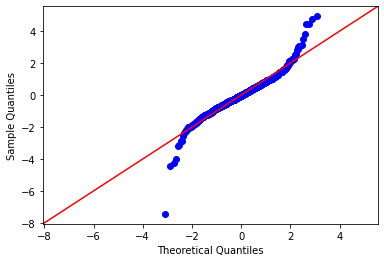

In [30]:
# 학습데이터의 잔차 확인
res=fitted_full_model.resid
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

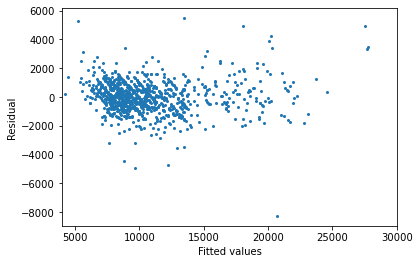

In [31]:
# residual pattern 확인
pred_y=fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [33]:
## 검증 데이터에 대한 예측 
pred_y2=fitted_full_model.predict(test_x)

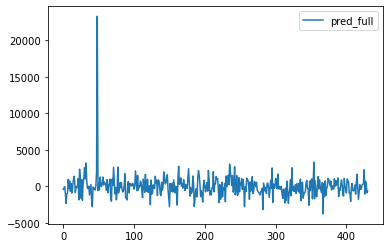

In [35]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y2),label="pred_full")
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error

In [39]:
## MSE 성능
mean_squared_error(y_true=test_y,y_pred=pred_y2)

2465318.614979252

# 변수선택법

In [40]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000028D3F060D90>, 'AIC': 19156.089113371476}


In [41]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x28d3ef234c0>,
 'AIC': 17011.319317194357}

In [42]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 1.6064608097076416 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17591.225035
Name: 211, dtype: object


In [43]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [44]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.08578133583068848 seconds.
Processed  630 models on 2 predictors in 1.9859693050384521 seconds.
Processed  7140 models on 3 predictors in 18.213419437408447 seconds.
Total elapsed time: 20.674915075302124 seconds.


In [45]:
models

,AIC,model
1,17863.078732,<statsmodels.regression.linear_model.Regressio...
2,17591.225035,<statsmodels.regression.linear_model.Regressio...
3,17439.343073,<statsmodels.regression.linear_model.Regressio...


In [46]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1937.
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:52:07   Log-Likelihood:                -8715.7
No. Observations:                1005   AIC:                         1.744e+04
Df Residuals:                    1001   BIC:                         1.746e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0239      0.001    -16.275      0.000      -0.027      -0.021
Mfg_Year    1493.0951     39.843     37.475      0.000    1414.910    1571.280
Weight        19.1363      0.956     20.012      0.000      17.260      21.013
const      -2.994e+06   7.92e+04    -37.810      0.000   -3.15e+06   -2.84e+06
==============================================================================
Omnibus:                      227.064   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3302.970
Skew:                          -0.605   Prob(JB):                         0.00
Kurtosis:                      11.799   Cond. No.                     1.38e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.90940
full model AIC:  17011.31932
full model MSE:  13598550.98305
selected model Rsquared:  0.85306
selected model AIC:  17439.34307
selected model MSE:  13598550.98305


Text(0, 0.5, 'BIC')

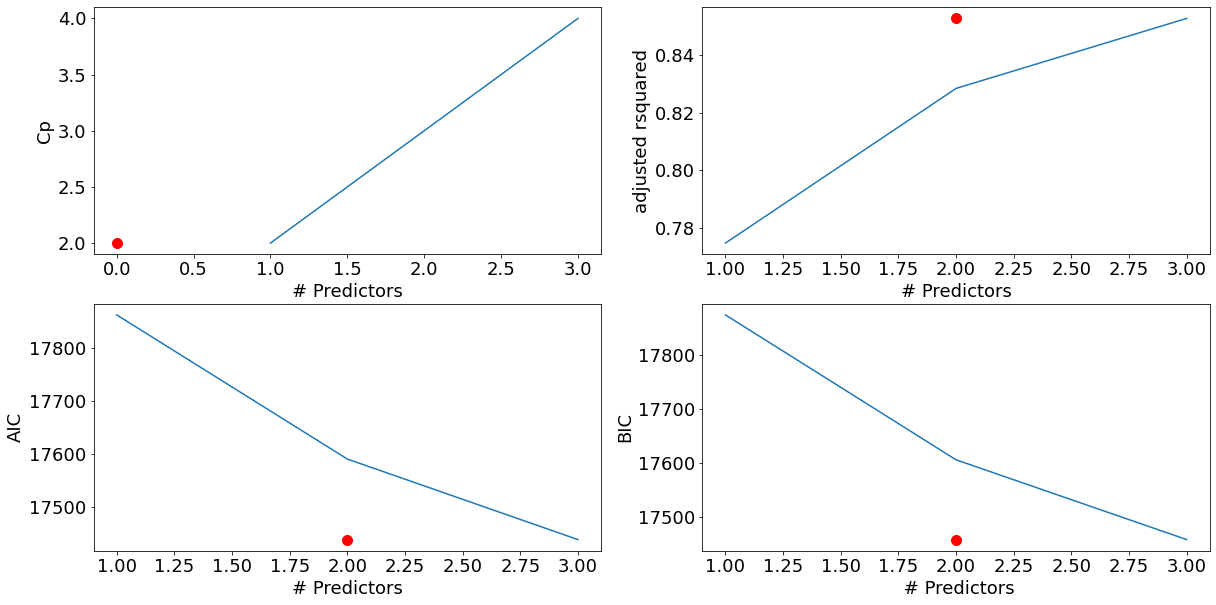

In [48]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [63]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model['AIC'] )
    return best_model

In [64]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [66]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.08130931854248047
Selected predictors: ['Mfg_Year', 'const']  AIC: 17863.078732470753
Processed  35 models on 2 predictors in 0.09691524505615234
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: 17591.225035269465
Processed  34 models on 3 predictors in 0.0950613021850586
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: 17453.120055562955
Processed  33 models on 4 predictors in 0.09473919868469238
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const']  AIC: 17312.492004965672
Processed  32 models on 5 predictors in 0.09646987915039062
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'const']  AIC: 17160.673587703277
Processed  31 models on 6 predictors in 0.0901803970336914
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'const']  AIC: 17134.821192520943
Processed  30 models on 7 predictors in 0.093170166015

In [67]:
Forward_best_model.aic

16999.58301196331

In [68]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     464.6
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:03:07   Log-Likelihood:                -8477.8
No. Observations:                1005   AIC:                         1.700e+04
Df Residuals:                     983   BIC:                         1.711e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1436.0886     48.009     29.913      0.000    1341.877    1530.301
Automatic_airco   2536.6399    189.796     13.365      0.000    2164.189    2909.091
HP                  35.8331      3.077     11.647      0.000      29.796      41.870
Weight              11.0586      1.185      9.335      0.000       8.734      13.383
KM                  -0.0157      0.001    -11.549      0.000      -0.018      -0.013
Powered_Windows    429.3377     80.379      5.341      0.000     271.604     587.072
Quarterly_Tax       13.4128      1.618      8.291      0.000      10.238      16.587
cc                  -1.8270      0.339     -5.391      0.000      -2.492      -1.162
Guarantee_Period    65.8066     14.862      4.428      0.000      36.641      94.972
BOVAG_Guarantee    529.3243    136.665      3.873      0.000     261.135     797.513
Tow_Bar           -228.4788     82.186     -2.780      0.006    -389.758     -67.199
Mfr_Guarantee      231.9640     77.782      2.982      0.003      79.327     384.601
Boardcomputer     -306.4810    125.344     -2.445      0.015    -552.454     -60.508
ABS               -308.5198    104.933     -2.940      0.003    -514.438    -102.602
Mfg_Month           21.4585     10.781      1.990      0.047       0.303      42.615
CD_Player          212.3608    104.449      2.033      0.042       7.391     417.330
Metallic_Rim       209.3117     95.412      2.194      0.028      22.076     396.547
Automatic          358.6555    165.839      2.163      0.031      33.216     684.095
Sport_Model        216.3553     89.634      2.414      0.016      40.460     392.251
Doors               74.2725     41.593      1.786      0.074      -7.349     155.894
Backseat_Divider  -207.6817    121.760     -1.706      0.088    -446.620      31.257
Cylinders        -6.764e+05   2.25e+04    -30.044      0.000   -7.21e+05   -6.32e+05
const            -1.691e+05   5628.725    -30.044      0.000    -1.8e+05   -1.58e+05
==============================================================================
Omnibus:                      124.515   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1143.961
Skew:                          -0.123   Prob(JB):                    3.91e-249
Kurtosis:                       8.221   Cond. No.                     9.20e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.2e-36. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 후진소거법

In [69]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [70]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [71]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.21142292022705078
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000028D67B6B190>
Processed  35 models on 34 predictors in 0.23577165603637695
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_

In [72]:
Backward_best_model.aic

16999.34628119009

In [73]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     408.1
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:04:44   Log-Likelihood:                -8474.7
No. Observations:                1005   AIC:                         1.700e+04
Df Residuals:                     980   BIC:                         1.712e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -333.1711    105.317     -3.164      0.002    -539.843    -126.499
Automatic          387.1954    166.725      2.322      0.020      60.016     714.375
Automatic_airco   2523.1806    190.014     13.279      0.000    2150.299    2896.062
BOVAG_Guarantee    520.0525    137.343      3.787      0.000     250.531     789.574
Backseat_Divider  -206.2905    122.123     -1.689      0.091    -445.943      33.362
Boardcomputer     -315.3842    125.633     -2.510      0.012    -561.926     -68.843
CD_Player          213.6284    106.099      2.013      0.044       5.421     421.836
CNG               -1.98e-07    6.6e-09    -30.017      0.000   -2.11e-07   -1.85e-07
Cylinders        -6.804e+05   2.27e+04    -30.017      0.000   -7.25e+05   -6.36e+05
Diesel            -7.21e-08    2.4e-09    -30.018      0.000   -7.68e-08   -6.74e-08
Doors               86.6124     42.256      2.050      0.041       3.689     169.536
Gears              276.8146    196.415      1.409      0.159    -108.627     662.257
Guarantee_Period    65.4366     14.915      4.387      0.000      36.167      94.706
HP                  35.2120      3.120     11.284      0.000      29.088      41.336
KM                  -0.0158      0.001    -11.594      0.000      -0.018      -0.013
Metallic_Rim       178.7219     98.070      1.822      0.069     -13.730     371.174
Mfg_Month           22.3992     10.798      2.074      0.038       1.210      43.589
Mfg_Year          1443.9485     48.319     29.883      0.000    1349.127    1538.770
Mfr_Guarantee      230.4683     77.667      2.967      0.003      78.056     382.881
Powered_Windows    413.8605     80.505      5.141      0.000     255.879     571.842
Quarterly_Tax       13.2777      1.619      8.202      0.000      10.101      16.454
Radio             1569.3552    803.056      1.954      0.051      -6.552    3145.263
Radio_cassette   -1617.4932    802.383     -2.016      0.044   -3192.080     -42.906
Sport_Model        198.4522     90.440      2.194      0.028      20.974     375.931
Tow_Bar           -229.2268     83.161     -2.756      0.006    -392.421     -66.033
Weight              11.0369      1.183      9.330      0.000       8.716      13.358
cc                  -1.8066      0.339     -5.333      0.000      -2.471      -1.142
const            -1.701e+05   5667.059    -30.017      0.000   -1.81e+05   -1.59e+05
==============================================================================
Omnibus:                      125.541   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1188.537
Skew:                          -0.102   Prob(JB):                    8.17e-259
Kurtosis:                       8.324   Cond. No.                     1.31e+16
=====================================================

# 단계적 선택법

In [89]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [90]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.07114386558532715
Selected predictors: ['Mfg_Year', 'const']  AIC: 17863.078732470753
forward
Processed  1 models on 0 predictors in 0.010658502578735352
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000028D68BFA790>
Processed  35 models on 2 predictors in 0.08744597434997559
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: 17591.225035269465
forward
Processed  2 models on 1 predictors in 0.00786447525024414
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000028D68C07FD0>
Processed  34 models on 3 predictors in 0.08029055595397949
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: 17453.120055562955
forward
Processed  3 models on 2 predictors in 0.01088404655456543
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_m

Processed  19 models on 18 predictors in 0.07060885429382324
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'cc', 'Guarantee_Period', 'BOVAG_Guarantee', 'Tow_Bar', 'Mfr_Guarantee', 'Boardcomputer', 'ABS', 'Mfg_Month', 'CD_Player', 'Metallic_Rim', 'Automatic', 'const']  AIC: 17002.67769823102
forward
Processed  18 models on 17 predictors in 0.06416177749633789
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'cc', 'Guarantee_Period', 'BOVAG_Guarantee', 'Tow_Bar', 'Mfr_Guarantee', 'Boardcomputer', 'ABS', 'Mfg_Month', 'CD_Player', 'Metallic_Rim', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000028D67B82C40>
Processed  18 models on 19 predictors in 0.08030438423156738
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'cc', 'Guarantee_Period', 'BOVAG_Guarantee', 

Processed  23 models on 22 predictors in 0.09977984428405762
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'cc', 'Guarantee_Period', 'BOVAG_Guarantee', 'Tow_Bar', 'Mfr_Guarantee', 'Boardcomputer', 'ABS', 'Mfg_Month', 'CD_Player', 'Metallic_Rim', 'Automatic', 'Sport_Model', 'Doors', 'Backseat_Divider', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000028D67B6D3D0>
backward
Processed  14 models on 23 predictors in 0.06028485298156738
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'cc', 'Guarantee_Period', 'BOVAG_Guarantee', 'Tow_Bar', 'Mfr_Guarantee', 'Boardcomputer', 'ABS', 'Mfg_Month', 'CD_Player', 'Metallic_Rim', 'Automatic', 'Sport_Model', 'Doors', 'Backseat_Divider', 'Cylinders', 'Age_08_04', 'const']  AIC: 16999.583011963317
forward
Processed  23 models on 22 predictors in 0.09567737579345703
Select

Processed  23 models on 22 predictors in 0.09014391899108887
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'cc', 'Guarantee_Period', 'BOVAG_Guarantee', 'Tow_Bar', 'Mfr_Guarantee', 'Boardcomputer', 'ABS', 'Mfg_Month', 'CD_Player', 'Metallic_Rim', 'Automatic', 'Sport_Model', 'Doors', 'Backseat_Divider', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000028D68C078B0>
backward
Total elapsed time: 5.2592480182647705 seconds.


In [91]:
Stepwise_best_model.aic

16999.58301196331

# 성능평가 

In [92]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(23,) (28,) (23,)


In [93]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [94]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [95]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [96]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

                 ALL         FORWARD        BACKWARD        STEPWISE
MSE   2465318.614979  2767364.973182  2742130.058605  2767364.973182
RMSE     1570.133311     1663.539892     1655.937818     1663.539892
MAE       902.924542      906.967028      910.517777      906.967028
MAPE        8.906899        8.922089        8.947614        8.922089


In [97]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
23
28
23
